#📊 مقارنة Decision Tree vs Random Forest


| المعيار             | Decision Tree 🌳                              | Random Forest 🌲🌲🌲                                                        |
| ------------------- | --------------------------------------------- | --------------------------------------------------------------------------- |
| **الفكرة الأساسية** | نموذج واحد يعتمد على تقسيم البيانات بشكل هرمي | مجموعة (ensemble) من أشجار قرار يتم تدريبها على عينات مختلفة ثم دمج النتائج |
| **سهولة الفهم**     | سهل جدًا، يمكن رسمه وتفسيره                   | أصعب في التفسير لأنه يحتوي على مئات/آلاف الأشجار                            |
| **السرعة**          | سريع جدًا في التدريب والتنبؤ                  | أبطأ (لأنه يعتمد على عدة أشجار)                                             |
| **الأداء**          | عرضة لـ overfitting لو العمق كبير             | أكثر دقة عادة لأنه يقلل من overfitting                                      |
| **الاستقرار**       | حساس للتغيرات الصغيرة في البيانات             | أكثر استقرارًا بفضل التصويت الجماعي                                         |
| **حالات الاستخدام** | مشاريع تعليمية، شروحات، datasets صغيرة        | تطبيقات عملية تحتاج دقة عالية مثل التنبؤ المالي أو الطب أو NLP              |


#1. Import Libraries

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
import zipfile

with zipfile.ZipFile('/content/home-data-for-ml-course.zip', 'r') as zip_ref:
    zip_ref.printdir()

File Name                                             Modified             Size
data_description.txt                           2019-11-30 13:52:26        13370
sample_submission.csv                          2019-11-30 13:52:26        31939
sample_submission.csv.gz                       2019-11-30 13:52:26        15685
test.csv                                       2019-11-30 13:52:26       451405
test.csv.gz                                    2019-11-30 13:52:26        83948
train.csv                                      2019-11-30 13:52:26       460676
train.csv.gz                                   2019-11-30 13:52:26        91387


In [ ]:
with zipfile.ZipFile('/content/home-data-for-ml-course.zip', 'r') as zip_ref:
    zip_ref.extract('train.csv', '.')
    zip_ref.extract('test.csv', '.')

## Load training data

In [ ]:
train_df = pd.read_csv("train.csv")

## Load testing data

In [ ]:
test_df = pd.read_csv("test.csv")

In [ ]:
display(train_df.head())


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
display(test_df.head())

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


#3. Preprocessing

In [ ]:
print("Missing values in train_df:")
print(train_df.isnull().sum()[train_df.isnull().sum() > 0])

Missing values in train_df:
LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


In [ ]:
print("\nMissing values in test_df:")
print(test_df.isnull().sum()[test_df.isnull().sum() > 0])


Missing values in test_df:
MSZoning           4
LotFrontage      227
Alley           1352
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType       894
MasVnrArea        15
BsmtQual          44
BsmtCond          45
BsmtExposure      44
BsmtFinType1      42
BsmtFinSF1         1
BsmtFinType2      42
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu      730
GarageType        76
GarageYrBlt       78
GarageFinish      78
GarageCars         1
GarageArea         1
GarageQual        78
GarageCond        78
PoolQC          1456
Fence           1169
MiscFeature     1408
SaleType           1
dtype: int64


##Dropping

In [ ]:
cols_to_drop = ['Alley', 'PoolQC', 'Fence', 'MiscFeature'] #very high number of missing values
train_df = train_df.drop(columns=cols_to_drop)
test_df = test_df.drop(columns=cols_to_drop)

#Imputing

##Impute numerical missing values with the median (to be less affected by outliers)

In [ ]:
numerical_cols_with_missing = ['LotFrontage', 'MasVnrArea', 'GarageYrBlt', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'GarageArea', 'GarageCars']
for col in numerical_cols_with_missing:
    if col in train_df.columns:
        train_median = train_df[col].median()
        train_df[col].fillna(train_median, inplace=True)
    if col in test_df.columns:
        test_median = test_df[col].median() # Use test data median for test set imputation
        test_df[col].fillna(test_median, inplace=True)

/tmp/ipython-input-1960461551.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df[col].fillna(train_median, inplace=True)
/tmp/ipython-input-1960461551.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

## Impute categorical missing values with the mode or a placeholder 'None'


In [ ]:

categorical_cols_with_missing = ['MSZoning', 'Utilities', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
                                 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
                                 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
                                 'GarageFinish', 'GarageQual', 'GarageCond', 'SaleType']

for col in categorical_cols_with_missing:
    if col in train_df.columns:
        train_mode = train_df[col].mode()[0]
        train_df[col].fillna(train_mode, inplace=True)
    if col in test_df.columns:
        test_mode = test_df[col].mode()[0] # Use test data mode for test set imputation
        test_df[col].fillna(test_mode, inplace=True)


/tmp/ipython-input-2507579125.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df[col].fillna(train_mode, inplace=True)
/tmp/ipython-input-2507579125.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usi

In [ ]:
# Impute remaining missing values in the test set
test_df['BsmtFullBath'].fillna(test_df['BsmtFullBath'].mode()[0], inplace=True)
test_df['BsmtHalfBath'].fillna(test_df['BsmtHalfBath'].mode()[0], inplace=True)

# Verify that missing values have been addressed in the test set
print("Missing values in test_df after handling remaining:")
print(test_df.isnull().sum()[test_df.isnull().sum() > 0])

Missing values in test_df after handling remaining:
Series([], dtype: int64)


/tmp/ipython-input-3937453612.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_df['BsmtFullBath'].fillna(test_df['BsmtFullBath'].mode()[0], inplace=True)
/tmp/ipython-input-3937453612.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].metho

##Encoding

In [ ]:
# Identify categorical columns
categorical_cols_train = train_df.select_dtypes(include='object').columns
categorical_cols_test = test_df.select_dtypes(include='object').columns

# Apply one-hot encoding
train_df_encoded = pd.get_dummies(train_df, columns=categorical_cols_train, dummy_na=False)
test_df_encoded = pd.get_dummies(test_df, columns=categorical_cols_test, dummy_na=False)

# Align columns - align test set to train set
test_df_encoded, train_df_encoded = test_df_encoded.align(train_df_encoded, join='left', axis=1, fill_value=0)

# Display the first few rows of the encoded dataframes and their shapes
display(train_df_encoded.head())
display(test_df_encoded.head())
print("Shape of train_df_encoded:", train_df_encoded.shape)
print("Shape of test_df_encoded:", test_df_encoded.shape)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,False,False,False,True,False,False,False,False,True,False
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,False,False,False,True,False,False,False,False,True,False
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,False,False,False,True,False,False,False,False,True,False
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,False,False,False,True,True,False,False,False,False,False
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,False,False,False,True,False,False,False,False,True,False


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1461,20,80.0,11622,5,6,1961,1961,0.0,468.0,...,False,False,False,True,False,False,False,False,True,False
1,1462,20,81.0,14267,6,6,1958,1958,108.0,923.0,...,False,False,False,True,False,False,False,False,True,False
2,1463,60,74.0,13830,5,5,1997,1998,0.0,791.0,...,False,False,False,True,False,False,False,False,True,False
3,1464,60,78.0,9978,6,6,1998,1998,20.0,602.0,...,False,False,False,True,False,False,False,False,True,False
4,1465,120,43.0,5005,8,5,1992,1992,0.0,263.0,...,False,False,False,True,False,False,False,False,True,False


Shape of train_df_encoded: (1460, 259)
Shape of test_df_encoded: (1459, 259)


<Axes: >

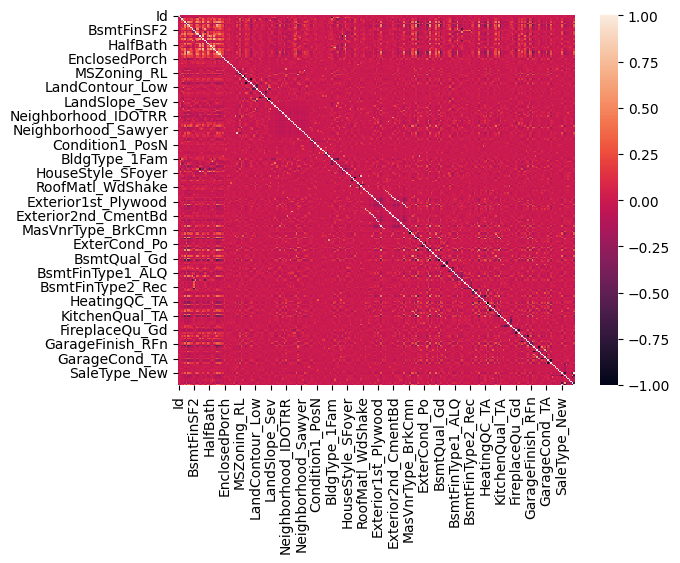

In [ ]:
sns.heatmap(train_df_encoded.corr())

<Axes: >

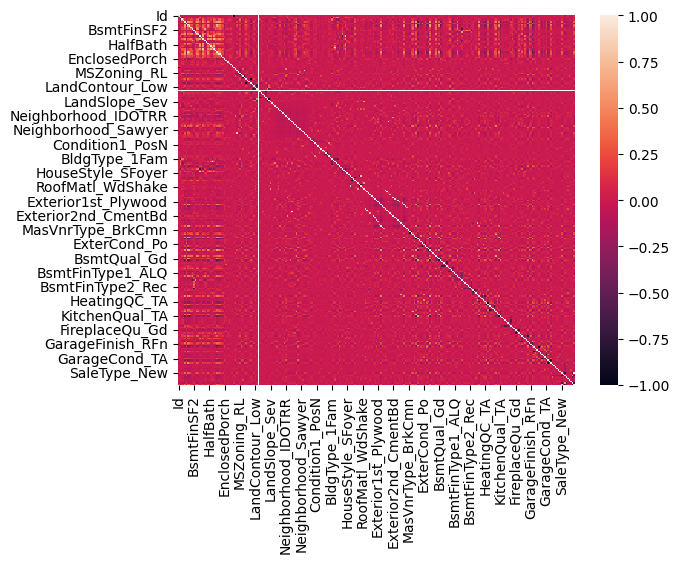

In [ ]:
sns.heatmap(test_df_encoded.corr())

In [ ]:
sns.pairplot(data = train_df_encoded)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Instantiate and train Decision Tree Regressor
dt_regressor = DecisionTreeRegressor(max_depth=5, random_state=42)
dt_regressor.fit(X_train, y_train)

# Instantiate and train Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=200, max_depth=5, random_state=42)
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, n_estimators=200, random_state=42)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Make predictions on the training data
y_train_pred_dt = dt_regressor.predict(X_train)
y_train_pred_rf = rf_regressor.predict(X_train)

# Calculate Mean Absolute Error (MAE)
mae_dt = mean_absolute_error(y_train, y_train_pred_dt)
mae_rf = mean_absolute_error(y_train, y_train_pred_rf)

# Calculate Root Mean Squared Error (RMSE)
rmse_dt = np.sqrt(mean_squared_error(y_train, y_train_pred_dt))
rmse_rf = np.sqrt(mean_squared_error(y_train, y_train_pred_rf))

# Print the results
print(f"Decision Tree - MAE: {mae_dt:.2f}, RMSE: {rmse_dt:.2f}")
print(f"Random Forest - MAE: {mae_rf:.2f}, RMSE: {rmse_rf:.2f}")

Decision Tree - MAE: 21492.32, RMSE: 29517.53
Random Forest - MAE: 17384.19, RMSE: 24402.65


In [ ]:
if mae_rf < mae_dt and rmse_rf < rmse_dt:
    print("Random Forest performed better than Decision Tree on the training data (lower MAE and RMSE).")
elif mae_dt < mae_rf and rmse_dt < rmse_rf:
    print("Decision Tree performed better than Random Forest on the training data (lower MAE and RMSE).")
elif mae_rf < mae_dt or rmse_rf < rmse_dt:
    print("Random Forest performed better than Decision Tree on the training data (lower MAE or RMSE).")
elif mae_dt < mae_rf or rmse_dt < rmse_rf:
     print("Decision Tree performed better than Random Forest on the training data (lower MAE or RMSE).")
else:
    print("Decision Tree and Random Forest performed equally on the training data (same MAE and RMSE).")

Random Forest performed better than Decision Tree on the training data (lower MAE and RMSE).


## Feature engineering to improve model performance.


In [ ]:
# Create 'TotalSF' by summing square footage features
train_df['TotalSF'] = train_df['1stFlrSF'] + train_df['2ndFlrSF']
test_df['TotalSF'] = test_df['1stFlrSF'] + test_df['2ndFlrSF']

# Calculate the latest year present in the combined YrSold columns
latest_year = max(train_df['YrSold'].max(), test_df['YrSold'].max())

# Create 'HouseAge' by subtracting YearBuilt from the latest year
train_df['HouseAge'] = latest_year - train_df['YearBuilt']
test_df['HouseAge'] = latest_year - test_df['YearBuilt']

# Display the first few rows with the new features
display(train_df[['TotalSF', 'HouseAge']].head())
display(test_df[['TotalSF', 'HouseAge']].head())

,TotalSF,HouseAge
0,1710,7
1,1262,34
2,1786,9
3,1717,95
4,2198,10


,TotalSF,HouseAge
0,896,49
1,1329,52
2,1629,13
3,1604,12
4,1280,18


## Hyperparameter tuning



##Tuning the Decision Tree

In [ ]:
from sklearn.model_selection import GridSearchCV #for tunning
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Define parameter grid for Decision Tree Regressor
param_grid_dt = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10]
}

# Instantiate GridSearchCV for Decision Tree
grid_search_dt = GridSearchCV(DecisionTreeRegressor(random_state=42), param_grid_dt, cv=5, scoring='neg_mean_absolute_error')

# Fit GridSearchCV for Decision Tree
grid_search_dt.fit(X_train, y_train)

# Print the best parameters for Decision Tree
print("Best parameters for Decision Tree:", grid_search_dt.best_params_)

Best parameters for Decision Tree: {'max_depth': 10, 'min_samples_split': 10}


##Tuning the Random Forest model

In [ ]:
# Define parameter grid for Random Forest Regressor
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7]
}

# Instantiate GridSearchCV for Random Forest
grid_search_rf = GridSearchCV(RandomForestRegressor(random_state=42), param_grid_rf, cv=5, scoring='neg_mean_absolute_error')

# Fit GridSearchCV for Random Forest
grid_search_rf.fit(X_train, y_train)

# Print the best parameters for Random Forest
print("Best parameters for Random Forest:", grid_search_rf.best_params_)

Best parameters for Random Forest: {'max_depth': 7, 'n_estimators': 300}


## Predict on test data



In [ ]:
# Access the best trained Decision Tree model
best_dt_model = grid_search_dt.best_estimator_

# Use the best Decision Tree model to predict on X_test
y_pred_dt_tuned = best_dt_model.predict(X_test)

# Access the best trained Random Forest model
best_rf_model = grid_search_rf.best_estimator_

# Use the best Random Forest model to predict on X_test
y_pred_rf_tuned = best_rf_model.predict(X_test)

# Display the first few predictions
print("Tuned Decision Tree Predictions (first 5):", y_pred_dt_tuned[:5])
print("Tuned Random Forest Predictions (first 5):", y_pred_rf_tuned[:5])

Tuned Decision Tree Predictions (first 5): [139480.49180328 136787.5        175806.25       177997.55434783
 213722.28571429]
Tuned Random Forest Predictions (first 5): [127111.61542259 153552.7369631  176809.42132251 180499.16307369
 205788.04226939]


## Prepare Submission File


In [ ]:

submission_df = pd.DataFrame({'Id': test_df['Id'], 'SalePrice': y_pred_rf_tuned})

# Save the submission file
submission_df.to_csv('submission.csv', index=False)

print("Submission file created successfully!")

Submission file created successfully!
